In [3]:
# Objectives: 
# 1) Use citipy to extract city names from lon and lat values
# 2) For each of the cities extract weather conditions using api
        

In [4]:
# pip install citipy

In [5]:
# Import libraries and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# API key for openweathermaps
from api_keys import weather_api_key

In [6]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Empty lists
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Pull 1500 random samples of lat and lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Translate lat and lngs to cities
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Keep only if city name is unique
    if city not in cities:
        cities.append(city)

# Print count and city names
print(len(cities))
print(cities)

590
['walvis bay', 'port-aux-francais', 'palu', 'longyearbyen', 'waitangi', 'taiohae', 'puerto natales', 'vilyuysk', 'blackmans bay', 'albany', 'zyryanovsk', 'bubaque', 'kasongo-lunda', 'greenville', 'grytviken', 'sao joao da barra', 'west island', 'adamstown', 'constantia', 'mariehamn', 'edinburgh of the seven seas', 'remire-montjoly', 'chui', 'ushuaia', 'belle fourche', 'kilkenny', 'jamestown', 'torghay', 'tres lagoas', 'utrik', 'cadale', 'kotabumi', 'bilibino', 'tromso', 'tanjung pandan', 'baise city', 'mount pearl', 'invercargill', 'kirakira', 'la passe', 'badger', 'pingnan', 'tsiombe', 'zeribet el oued', 'ust-nera', 'port blair', 'iqaluit', 'sao paulo de olivenca', 'alta', 'egilsstadir', 'susuman', 'tiksi', 'ginir', 'hamilton', 'vorgashor', 'bardai', 'lebu', 'autazes', 'aykhal', "ytyk-kyuyel'", 'saldanha', 'ordos', 'mar del plata', 'beteza', 'northam', 'vilyuchinsk', 'punta arenas', 'el porvenir', 'ilulissat', 'olonkinbyen', 'anadyr', 'madimba', 'richards bay', 'hamada', 'labrador

In [7]:
# Compile weather data using OpenWeatherMap api

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Initialize list
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all cities
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Build url to send request
    city_url = url + "&q=" + city
    
    # Increment count
    record_count += 1

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
        pass
              
print("Done!")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Done!


In [8]:
# Convert to dataframe
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64


In [9]:
# Top five
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,walvis bay,-22.9575,14.5053,11.21,94,6,1.61,NA,1726620199
1,port-aux-francais,-49.3500,70.2167,4.96,95,100,12.10,TF,1726620199
2,palu,-0.8917,119.8707,31.72,56,77,0.35,ID,1726620199
3,longyearbyen,78.2186,15.6401,5.91,100,100,0.51,SJ,1726620199
4,waitangi,-43.9535,-176.5597,7.68,73,89,7.15,NZ,1726620199


In [10]:
# Export to csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,11.21,94,6,1.61,NaN,1726620199
1,port-aux-francais,-49.3500,70.2167,4.96,95,100,12.10,TF,1726620199
2,palu,-0.8917,119.8707,31.72,56,77,0.35,ID,1726620199
3,longyearbyen,78.2186,15.6401,5.91,100,100,0.51,SJ,1726620199
4,waitangi,-43.9535,-176.5597,7.68,73,89,7.15,NZ,1726620199


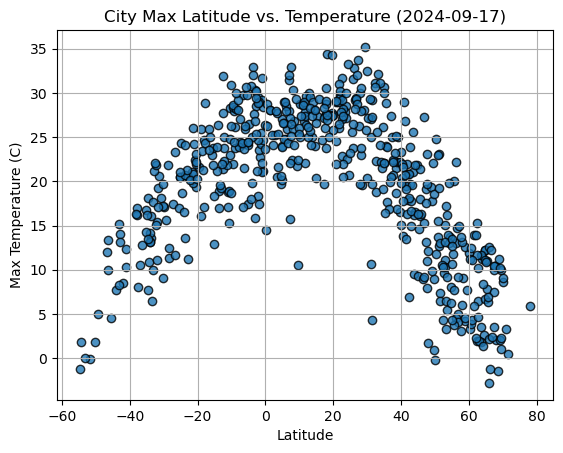

In [12]:
# Associate Latitude and temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save 
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

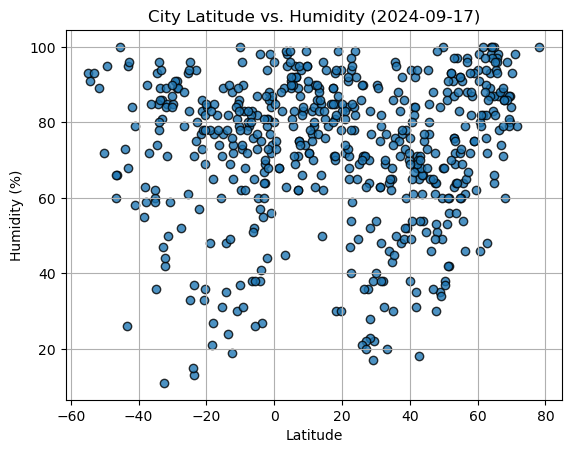

In [13]:
# Associate Latitude and humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save
plt.savefig("Humidity_vs_Lat.png")

# Show plot
plt.show()

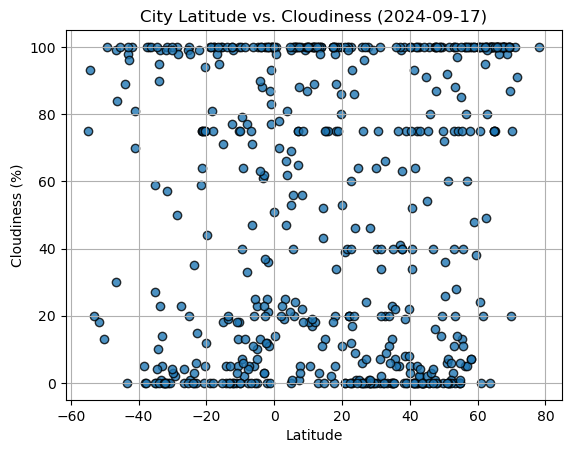

In [14]:
# Associate Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save 
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

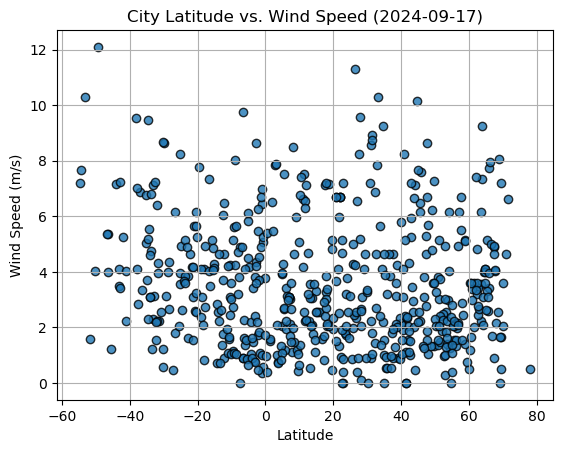

In [15]:
# Associate Latitude and wind speed

plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("Windspeed_vs_Lat.png")

# Show plot
plt.show()

In [16]:
# Regression analysis for each of the pairs above.

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,longyearbyen,78.2186,15.6401,5.91,100,100,0.51,SJ,1726620199
6,vilyuysk,63.7553,121.6247,3.54,89,100,3.56,RU,1726620199
8,albany,42.6001,-73.9662,19.70,65,100,1.02,US,1726619911
9,zyryanovsk,49.7386,84.2719,0.92,68,0,1.33,KZ,1726620199
10,bubaque,11.2833,-15.8333,26.84,83,100,7.51,GW,1726620199


In [18]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,11.21,94,6,1.61,NaN,1726620199
1,port-aux-francais,-49.3500,70.2167,4.96,95,100,12.10,TF,1726620199
2,palu,-0.8917,119.8707,31.72,56,77,0.35,ID,1726620199
4,waitangi,-43.9535,-176.5597,7.68,73,89,7.15,NZ,1726620199
5,puerto natales,-51.7236,-72.4875,-0.06,89,18,1.57,CL,1726620199


The r-value is: 0.630059287165639


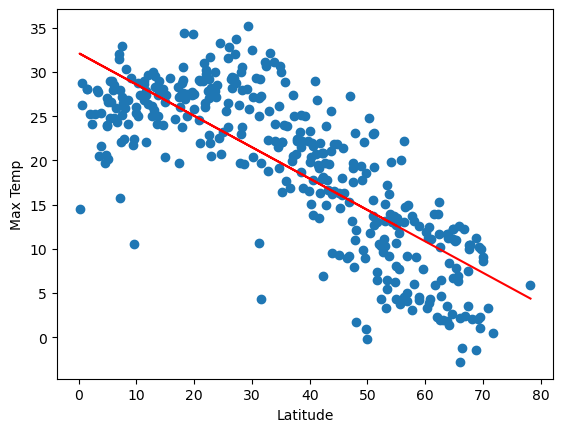

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-value is: 0.6446068433523616


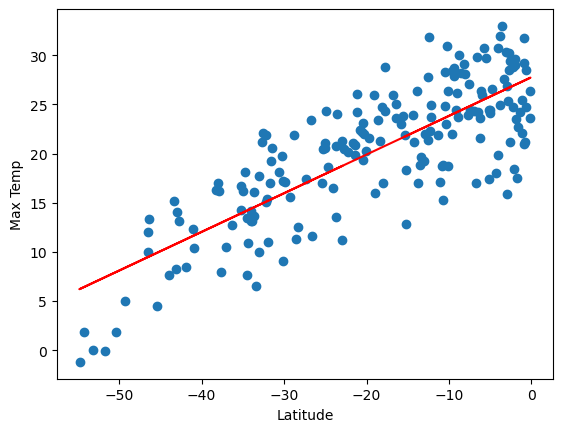

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

The r-value is: 0.00015262969732907542


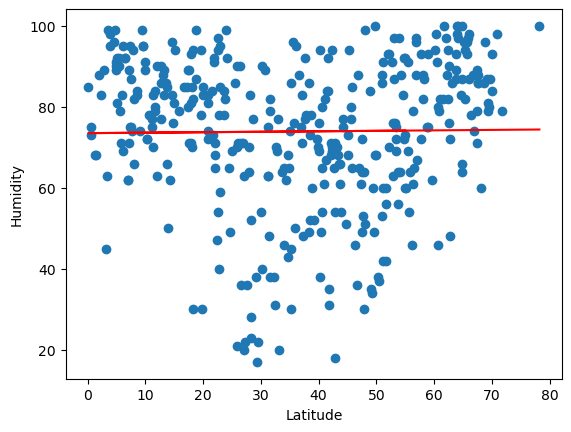

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.007652339225944964


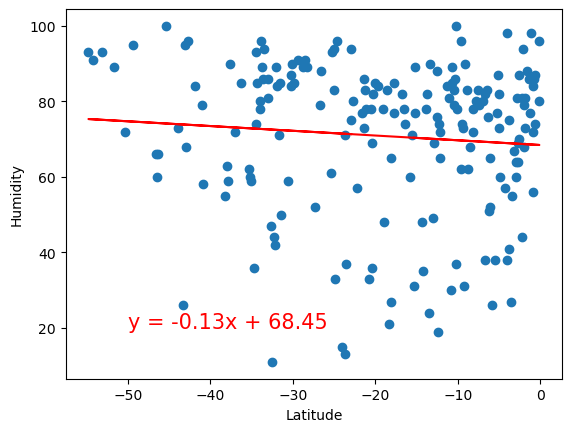

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

The r-value is: 0.01651237079895849


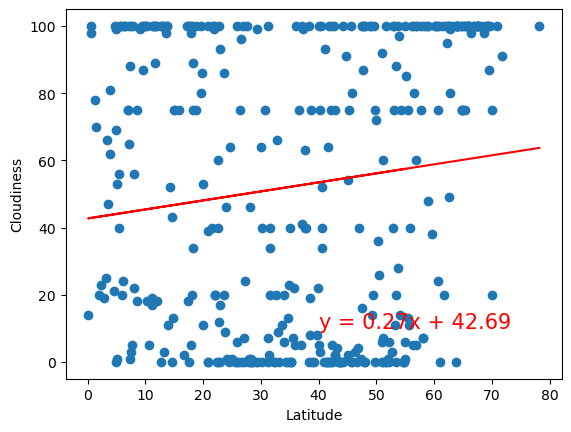

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.0013897001599228645


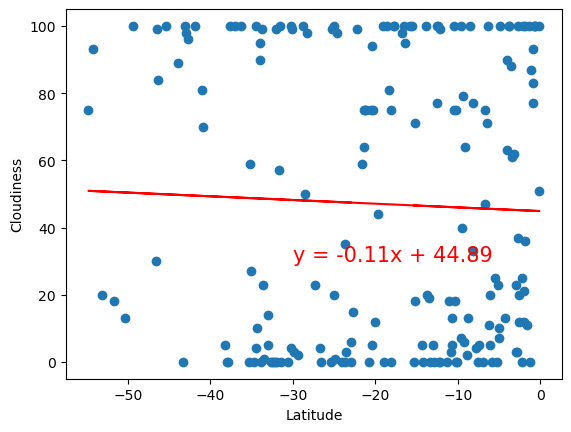

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

The r-value is: 0.0001617292837835694


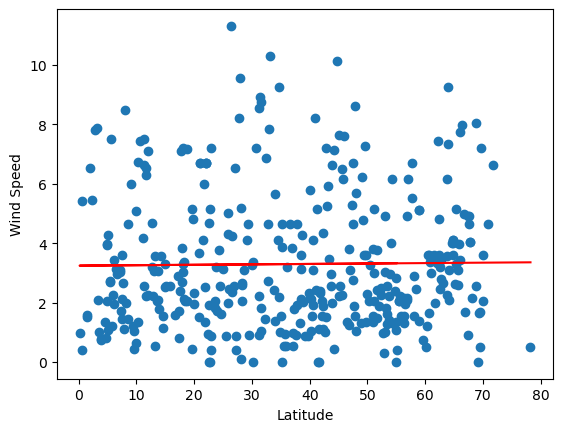

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.09503043068490429


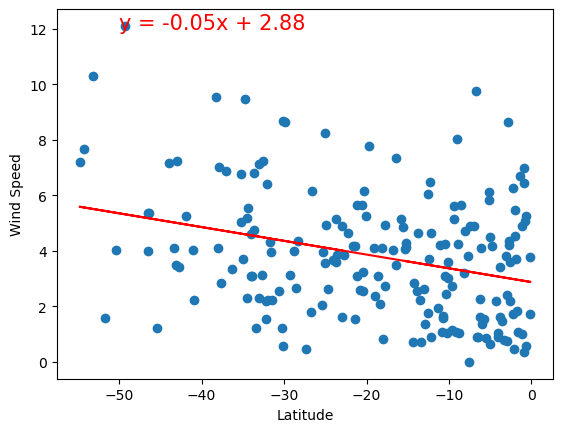

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))